






<h2 id='part1'>Compare the Data - 2</h2>


Compare 2017 and 2020

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

df_17 = pd.read_csv('../data/stack_overflow_2017/survey_results_public.csv') #Uncomment for 2017
df_20 = pd.read_csv('../data/stack_overflow_2020/survey_results_public.csv') #Uncomment for 2020

In [2]:
df_17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8



**1.** Let's # of rows and columns

In [4]:
num_rows_17 = df_17.shape[0] # rows, 2017
num_cols_17 = df_17.shape[1] # columns, 2017

num_rows_20 = df_20.shape[0] # rows, 2017
num_cols_20 = df_20.shape[1] # columns, 2017

print("Year 2017 - Rows in the dataset: ", num_rows_17, "; Colums in the dataset: ", num_cols_17)
print("Year 2020 - Rows in the dataset: ", num_rows_20, "; Colums in the dataset: ", num_cols_20)

Year 2017 - Rows in the dataset:  51392 ; Colums in the dataset:  154
Year 2020 - Rows in the dataset:  64461 ; Colums in the dataset:  61



**2.** What is the percentage of `null` in 2017 vs. 2020?

In [5]:
null_per_17 = df_17.isnull().sum().sum()/(num_rows_17*num_cols_17)
null_per_20 = df_20.isnull().sum().sum()/(num_rows_20*num_cols_20)

print ("Year 2017 - Percentage of Null: ", "{:.2f}".format(null_per_17*100), "%")
print ("Year 2020 - Percentage of Null: ", "{:.2f}".format(null_per_20*100), "%")

Year 2017 - Percentage of Null:  45.32 %
Year 2020 - Percentage of Null:  23.11 %


**3. (2017)** - `It's better to ship now and optimize later`

In [6]:
shipit_vals_17 = df_17.ShipIt.value_counts() #2017

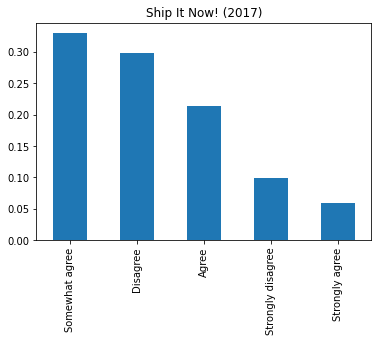

In [7]:
#Bar chart of the proportion of individuals in each preference 
(shipit_vals_17/(num_rows_17 - df_17.ShipIt.isnull().sum())).plot(kind="bar");
plt.title("Ship It Now! (2017)");

**4. (2017)** - `Tab or Spaces?`

In [8]:
tabspac_vals_17 = df_17.TabsSpaces.value_counts() #2017

In [9]:
tabspac_vals_17

Tabs      16682
Spaces    14667
Both       7502
Name: TabsSpaces, dtype: int64

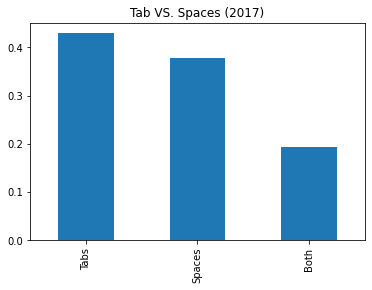

In [10]:
#Bar chart of the proportion of individuals in each preference 
(tabspac_vals_17/(num_rows_17 - df_17.TabsSpaces.isnull().sum())).plot(kind="bar");
plt.title("Tab VS. Spaces (2017)");

**NOTE** Function to be used to parse the language columns 

In [11]:
import re
def total_count(df, col1, col2, look_for, separator):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        # loop through rows
        for idx in range(df.shape[0]):
            # Split the string to separate the various languages used by the responder (if > 1)
            langs = df[col1][idx].split(separator)
            if val in langs:
                new_df[val] += int(df[col2][idx])
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

**5.** Languages used

In [12]:
lang_used_17 = df_17.HaveWorkedLanguage.value_counts() #2017
lang_used_20 = df_20.LanguageWorkedWith.value_counts() #2020

In [13]:
lu_17 = lang_used_17.reset_index()
lu_20 = lang_used_20.reset_index()

In [14]:
lu_17.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
lu_20.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [15]:
possible_vals_17 = ["Assembly", "C", "C#", "C++", "CoffeeScript", "Haskell", "Go", "Groovy", "Java", "JavaScript", 
                    "Lua", "Matlab", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Scala", "SQL", "Swift", 
                    "TypeScript", "VBA", "VB.NET", "Visual Basic 6"];

In [16]:
possible_vals_20 = ["Assembly", "Bash/Shell/PowerShell", "C", "C#", "C++", "Dart", "Go", "Haskell", "HTML/CSS", "Java",
                    "JavaScript", "Julia", "Kotlin", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Rust", 
                    "Scala", "SQL", "Swift", "TypeScript", "VBA"];

In [17]:
lu_17_df = total_count(lu_17, 'language', 'count', possible_vals_17, '; ')

In [18]:
lu_20_df = total_count(lu_20, 'language', 'count', possible_vals_20, ';')

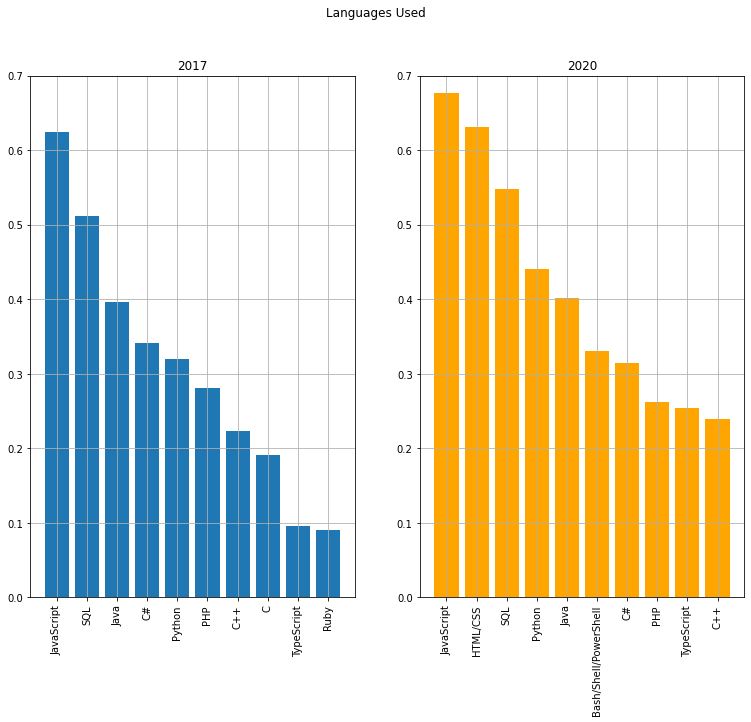

In [19]:
# Bar chart of the proportion of the top 10 languages/combinations for the individuals in count_vals

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Languages Used")
fig.set_figheight(9.6) 
fig.set_figwidth(12.8)

ax1.bar(lu_17_df[:10]['language'].to_list(), lu_17_df[:10]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))
ax1.tick_params('x', labelrotation=90)
ax1.set_title("2017")
ax1.set_ylim([0, 0.7])
ax1.grid()

ax2.bar(lu_20_df[:10]['language'].to_list(), lu_20_df[:10]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()), color = "orange")
ax2.tick_params('x', labelrotation=90)
ax2.set_title("2020")
ax2.set_ylim([0, 0.7])
ax2.grid();

**6.** Languages Wanted

In [29]:
lang_wanted_17 = df_17.WantWorkLanguage.value_counts() #2017
lang_wanted_20 = df_20.LanguageDesireNextYear.value_counts() #2020

In [30]:
lw_17 = lang_wanted_17.reset_index()
lw_20 = lang_wanted_20.reset_index()

In [31]:
lw_17.rename(columns={'index': 'language', 'WantWorkLanguage': 'count'}, inplace=True)
lw_20.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [32]:
possible_vals_17 = ["Assembly", "C", "C#", "C++", "CoffeeScript", "Haskell", "Go", "Groovy", "Java", "JavaScript", 
                    "Lua", "Matlab", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Scala", "SQL", "Swift", 
                    "TypeScript", "VBA", "VB.NET", "Visual Basic 6"];

In [33]:
possible_vals_20 = ["Assembly", "Bash/Shell/PowerShell", "C", "C#", "C++", "Dart", "Go", "Haskell", "HTML/CSS", "Java",
                    "JavaScript", "Julia", "Kotlin", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Rust", 
                    "Scala", "SQL", "Swift", "TypeScript", "VBA"];

In [35]:
lw_17_df = total_count(lw_17, 'language', 'count', possible_vals_20, ';')

In [36]:
lw_20_df = total_count(lw_20, 'language', 'count', possible_vals_20, ';')

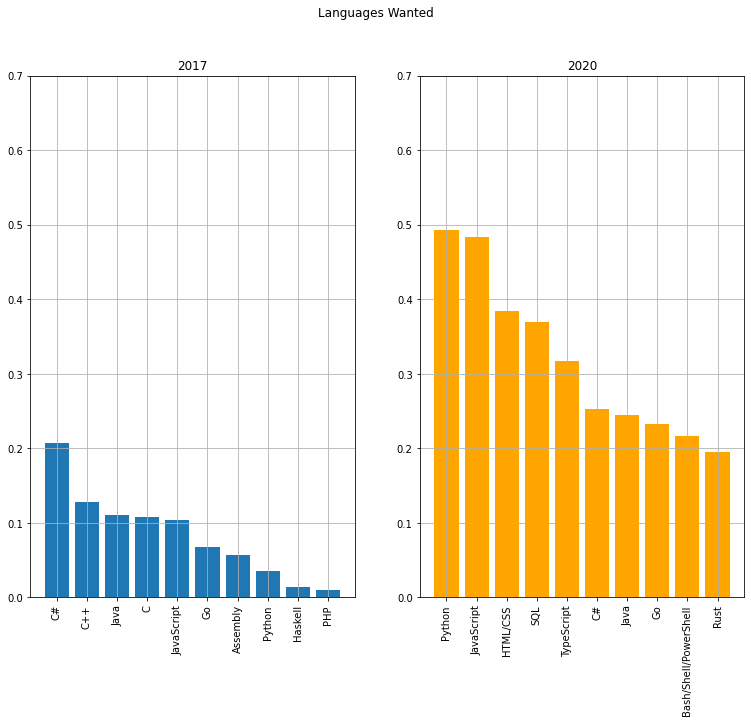

In [37]:
# Bar chart of the proportion of the top 10 languages/combinations for the individuals in count_vals

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Languages Wanted")
fig.set_figheight(9.6) 
fig.set_figwidth(12.8)

ax1.bar(lw_17_df[:10]['language'].to_list(), lw_17_df[:10]['count'].to_list()
        /(num_rows_17 - df_17.WantWorkLanguage.isnull().sum()))
ax1.tick_params('x', labelrotation=90)
ax1.set_title("2017")
ax1.set_ylim([0, 0.7])
ax1.grid()

ax2.bar(lw_20_df[:10]['language'].to_list(), lw_20_df[:10]['count'].to_list()
        /(num_rows_20 - df_20.LanguageDesireNextYear.isnull().sum()), color = "orange")
ax2.tick_params('x', labelrotation=90)
ax2.set_title("2020")
ax2.set_ylim([0, 0.7])
ax2.grid();